# Task
PCA
Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.
Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.
Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.
Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
Task 6: Conclusion and Insights

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.


Here is all the data you need:
"wine.csv"

## Data loading

### Subtask:
Load the "wine.csv" dataset.


**Reasoning**:
Load the "wine.csv" dataset into a pandas DataFrame, display the first 5 rows and the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('wine.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'wine.csv' not found. Please ensure the file exists in the current directory.")
    df = None # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse 'wine.csv'. Please check the file format.")
    df = None # Set df to None to indicate failure
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None # Set df to None to indicate failure

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(178, 14)


## Data exploration

### Subtask:
Explore the loaded wine dataset.


**Reasoning**:
Examine the shape, data types, descriptive statistics, and missing values of the dataframe and print the first few rows.



In [2]:
print("Shape of the DataFrame:", df.shape)
print("\nData types of columns:")
df.info()
print("\nDescriptive statistics for numerical features:")
display(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nFirst few rows of the DataFrame:")
display(df.head())

Shape of the DataFrame: (178, 14)

Data types of columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB

Descriptive statistics for numerical features:


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000



Missing values per column:
Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

First few rows of the DataFrame:


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Data visualization

### Subtask:
Visualize the distribution and relationships within the wine dataset.


**Reasoning**:
Visualize the distribution and relationships of the numerical features in the wine dataset using histograms, box plots, density plots, and a correlation heatmap.



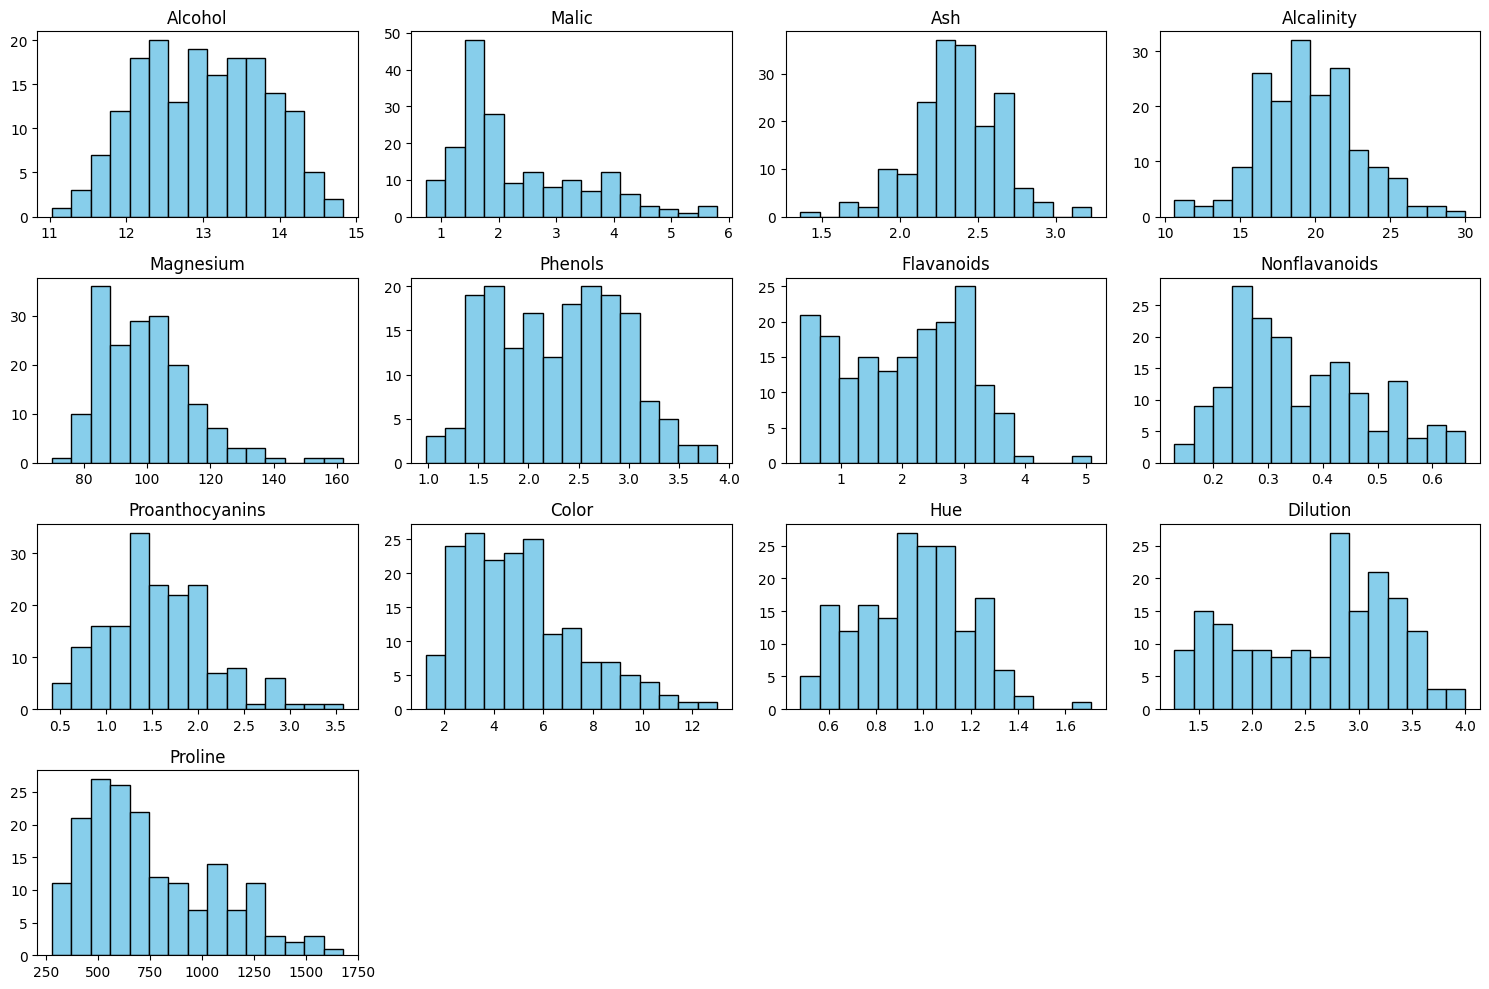

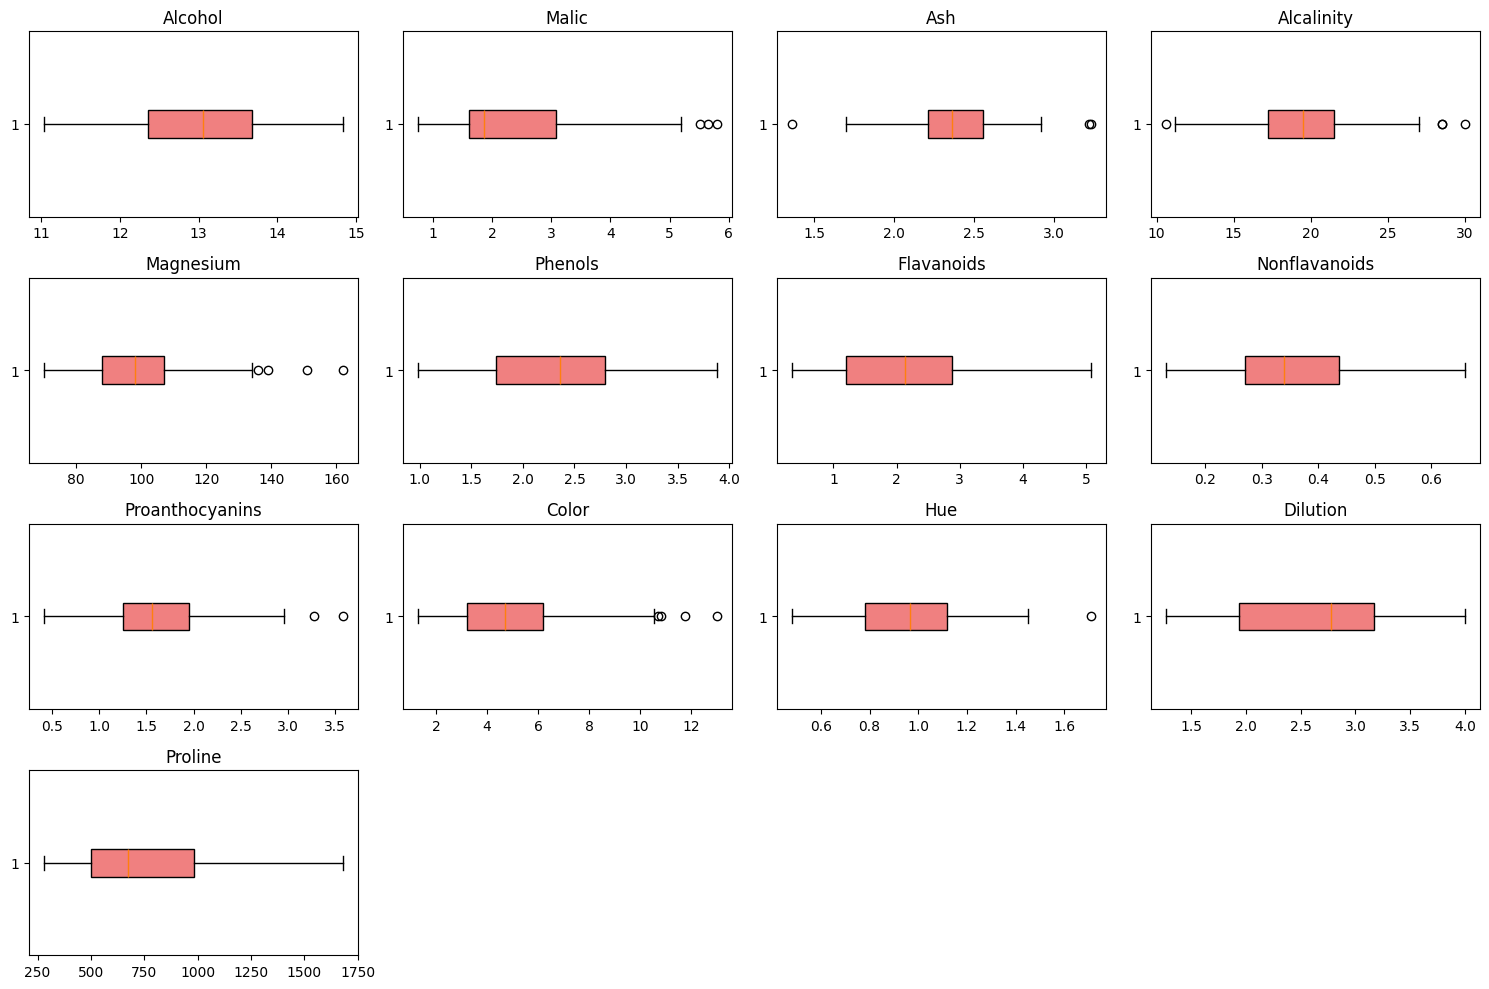

<ipython-input-3-1548059503>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], color='green', shade=True)
<ipython-input-3-1548059503>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], color='green', shade=True)
<ipython-input-3-1548059503>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], color='green', shade=True)
<ipython-input-3-1548059503>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], color='green', shade=True)
<ipython-input-3-1548059503>:27: FutureWarni

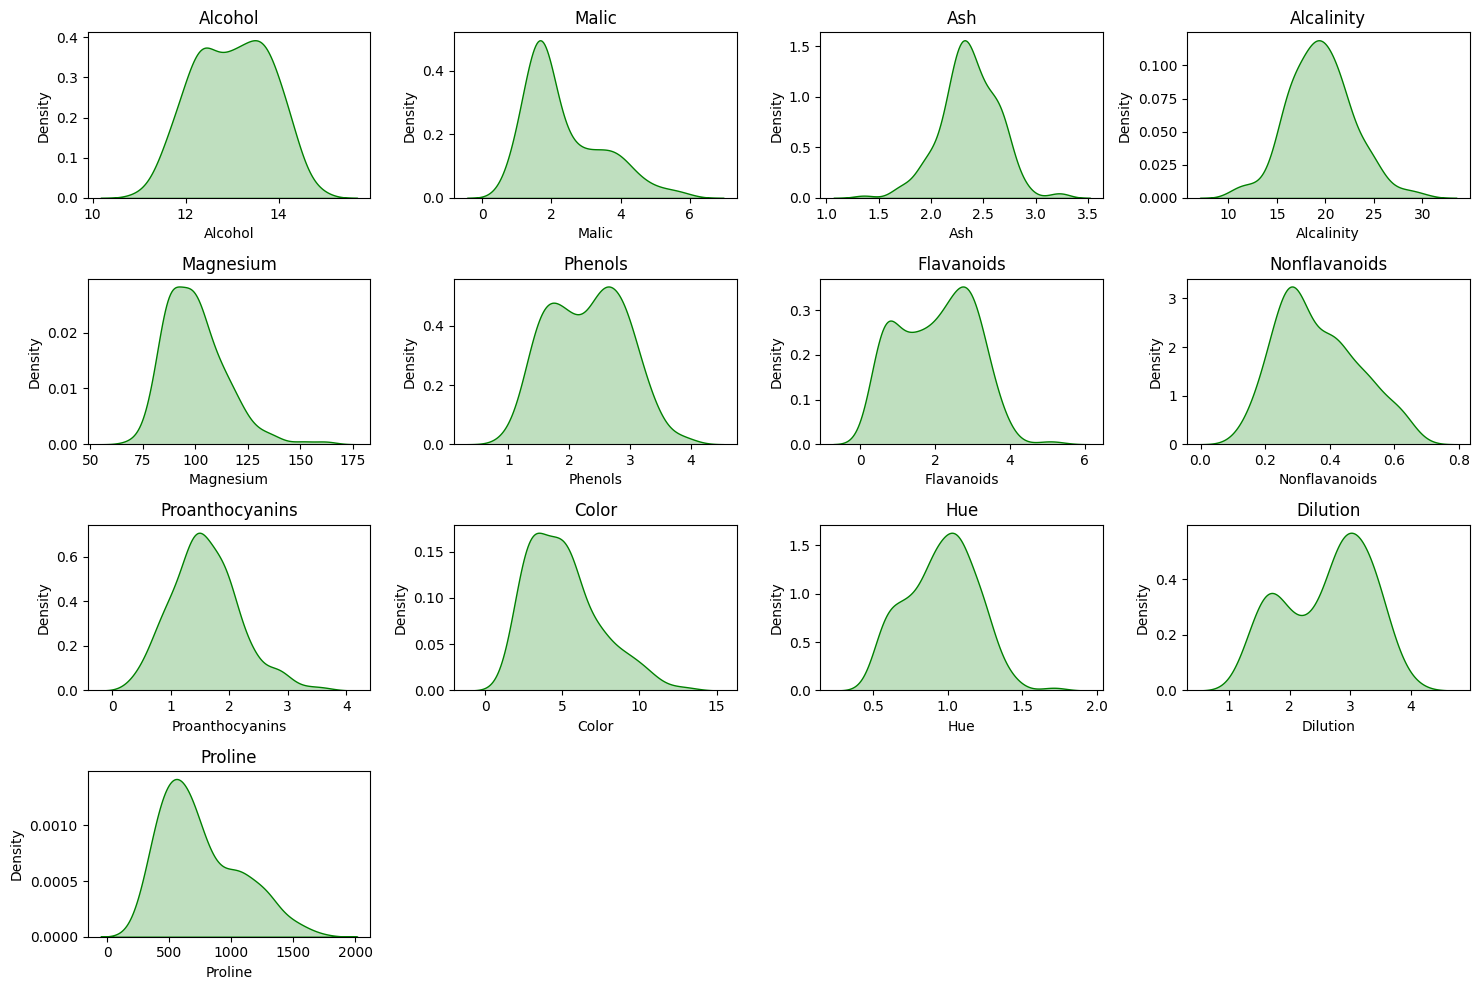

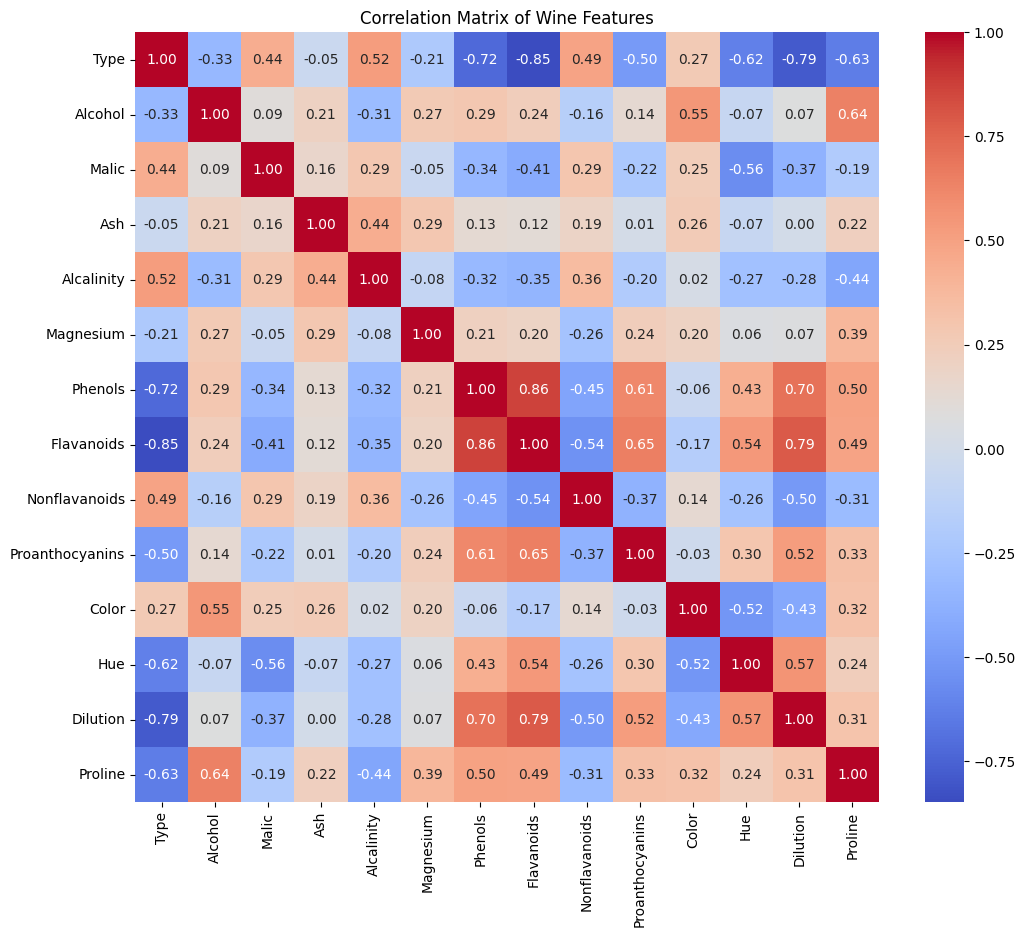

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[1:]):  # Exclude 'Type' column
    plt.subplot(4, 4, i + 1)
    plt.hist(df[col], bins=15, color='skyblue', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
    plt.title(col)
plt.tight_layout()
plt.show()


# Density plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(df[col], color='green', shade=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()

## Data preparation

### Subtask:
Standardize the features in the wine dataset.


**Reasoning**:
Standardize the features using StandardScaler, excluding the 'Type' column.



In [4]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features (excluding 'Type')
scaler.fit(df.drop('Type', axis=1))

# Transform the numerical features
scaled_features = scaler.transform(df.drop('Type', axis=1))

# Create a new DataFrame with the scaled features and the 'Type' column
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[1:])
df_scaled['Type'] = df['Type']

# Display the first few rows of the scaled DataFrame
display(df_scaled.head())

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1


## Feature engineering

### Subtask:
Apply PCA to the standardized data, determine the optimal number of principal components, and transform the data.


**Reasoning**:
Apply PCA to the standardized data, determine the optimal number of principal components, and transform the data.



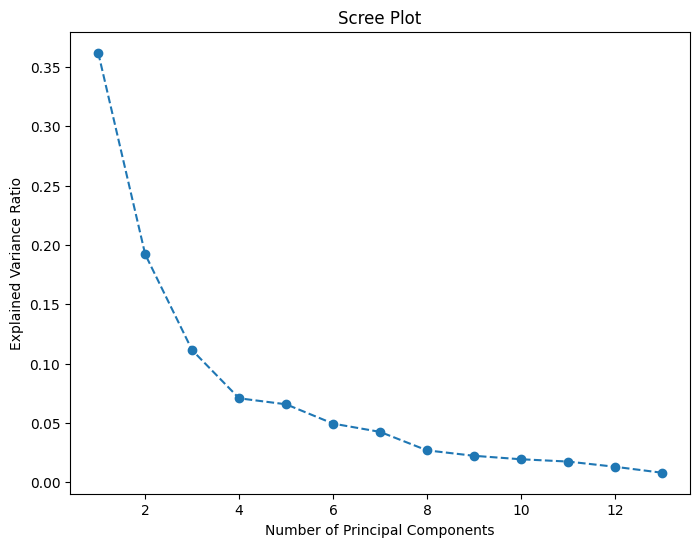

Optimal number of components to retain at least 95% variance: 10


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Type
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,1
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,1
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,1
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,1
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,1


In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA without specifying the number of components
pca = PCA()

# Fit PCA to the standardized data (excluding the 'Type' column)
pca.fit(df_scaled.drop('Type', axis=1))

# Analyze explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Find optimal number of components (at least 95% variance explained)
optimal_components = next((i for i, v in enumerate(cumulative_variance_ratio) if v >= 0.95), len(cumulative_variance_ratio) -1)
print(f"Optimal number of components to retain at least 95% variance: {optimal_components + 1}")

# Reinitialize PCA with the optimal number of components
pca = PCA(n_components=optimal_components + 1)

# Fit and transform the data
pca.fit(df_scaled.drop('Type', axis=1))
pca_result = pca.transform(df_scaled.drop('Type', axis=1))
df_pca = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(optimal_components+1)])
df_pca['Type'] = df_scaled['Type']

# Display the first few rows of the PCA-transformed data
display(df_pca.head())

## Data clustering

### Subtask:
Apply K-means clustering to the original, standardized dataset (`df_scaled`), visualize the clusters, and evaluate the clustering performance.


**Reasoning**:
Apply K-means clustering to the standardized dataset, visualize the clusters using PCA for visualization, and evaluate the clustering performance using silhouette and Davies-Bouldin scores.



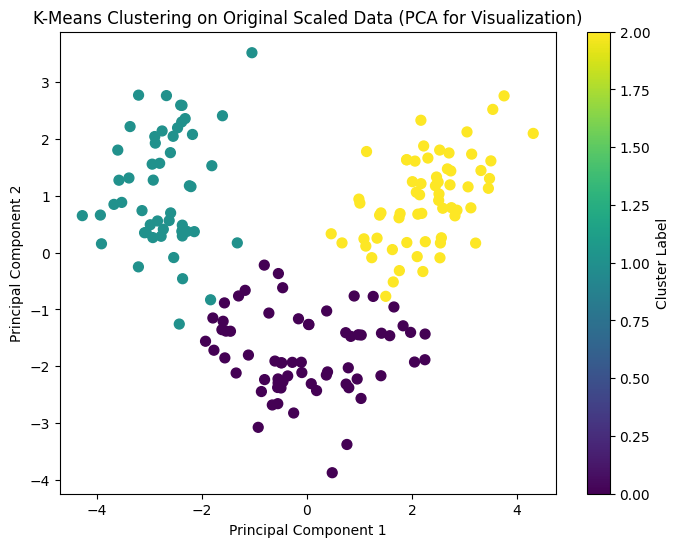

Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.3891879777181648


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Drop the 'Type' column for clustering
df_scaled_features = df_scaled.drop('Type', axis=1)

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Set n_init explicitly
kmeans.fit(df_scaled_features)

# Get cluster labels and add to the scaled DataFrame
df_scaled['cluster_label_original'] = kmeans.labels_

# Use PCA for visualization (2 components)
pca_viz = PCA(n_components=2, random_state=42)
pca_result_viz = pca_viz.fit_transform(df_scaled_features)

# Create a DataFrame for visualization
df_pca_viz = pd.DataFrame(data=pca_result_viz, columns=['PC1', 'PC2'])
df_pca_viz['cluster_label_original'] = df_scaled['cluster_label_original']

# Visualize the clusters using the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_viz['PC1'], df_pca_viz['PC2'], c=df_pca_viz['cluster_label_original'], cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on Original Scaled Data (PCA for Visualization)')
plt.colorbar(label='Cluster Label')
plt.show()

# Calculate and print evaluation metrics
silhouette_avg = silhouette_score(df_scaled_features, df_scaled['cluster_label_original'])
davies_bouldin = davies_bouldin_score(df_scaled_features, df_scaled['cluster_label_original'])

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

## Data clustering

### Subtask:
Apply K-means clustering to the PCA-transformed dataset (`df_pca`), visualize the clusters.


**Reasoning**:
Apply KMeans clustering to the PCA-transformed data, get cluster labels, visualize the clusters using a scatter plot of the first two principal components, and color the points by cluster assignment.



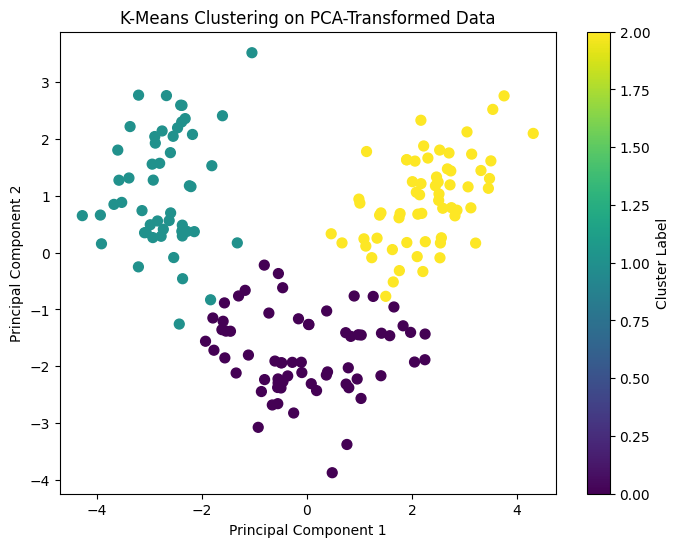

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop the 'Type' column for clustering
df_pca_features = df_pca.drop('Type', axis=1)

# Initialize and fit KMeans model
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca.fit(df_pca_features)

# Get cluster labels
cluster_labels_pca = kmeans_pca.labels_

# Add cluster labels to the DataFrame
df_pca['cluster_label_pca'] = cluster_labels_pca

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster_label_pca'], cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.colorbar(label='Cluster Label')
plt.show()

## Model evaluation

### Subtask:
Compare clustering results and analyze the impact of PCA.


**Reasoning**:
Compare the clustering results visually and quantitatively, then analyze the impact of PCA on clustering and summarize the findings.



Silhouette Score (PCA): 0.29867482943692886
Davies-Bouldin Index (PCA): 1.3363263335155773


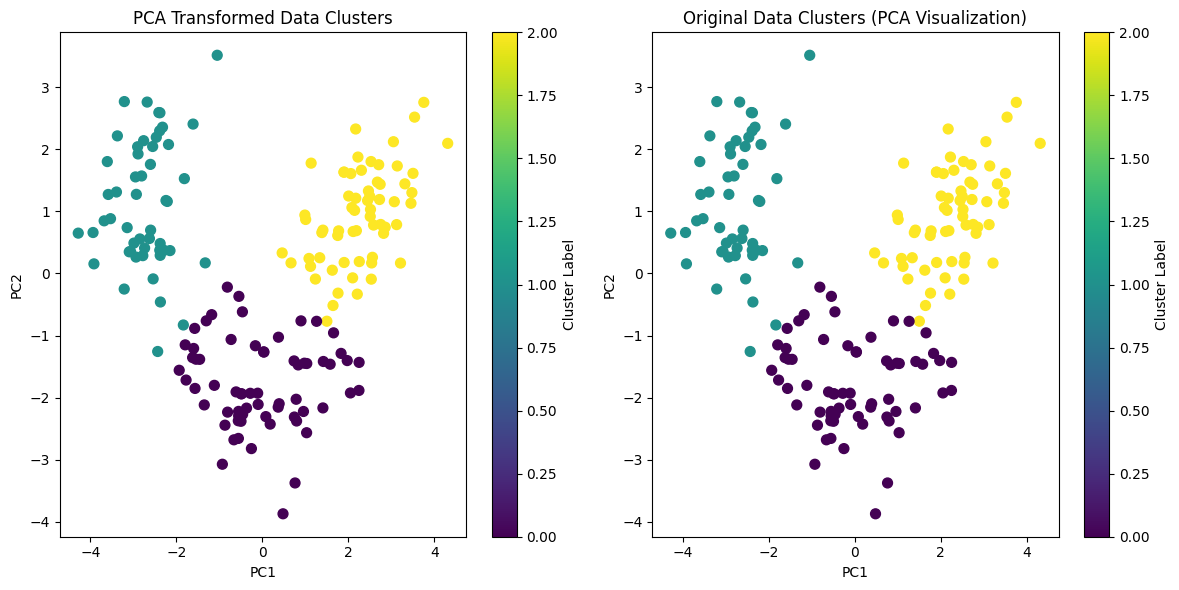

In [9]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Calculate silhouette and Davies-Bouldin scores for PCA data (if not already done)
silhouette_pca = silhouette_score(df_pca.drop(['Type', 'cluster_label_pca'], axis=1), df_pca['cluster_label_pca'])
davies_bouldin_pca = davies_bouldin_score(df_pca.drop(['Type', 'cluster_label_pca'], axis=1), df_pca['cluster_label_pca'])

print(f"Silhouette Score (PCA): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA): {davies_bouldin_pca}")

# Visual comparison: Scatter plots of original and PCA clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster_label_pca'], cmap='viridis', s=50)
plt.title('PCA Transformed Data Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')

plt.subplot(1, 2, 2)
plt.scatter(df_pca_viz['PC1'], df_pca_viz['PC2'], c=df_scaled['cluster_label_original'], cmap='viridis', s=50)
plt.title('Original Data Clusters (PCA Visualization)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()



 **Overall analysis and important points based on the objective and the code provided:**

Overall Analysis and Important Points

This analysis follows the task breakdown provided, covering the process from data exploration to comparing clustering results and drawing conclusions.

Task 1: Exploratory Data Analysis (EDA)

Data Loading and Basic Exploration: The wine.csv dataset was successfully loaded and basic exploration was performed. The dataset contains 178 samples and 14 features. No missing values were found, indicating a clean dataset for analysis.
Distribution of Features: Histograms, box plots, and density plots were used to visualize the distribution of individual features. These visualizations help to understand the spread, central tendency, and potential outliers within each feature. For example, box plots can highlight features with a large range or significant outliers.
Feature Correlations: A correlation matrix heatmap was generated to investigate the relationships between features. This visualization helps identify features that are highly correlated, which could potentially be redundant or provide similar information. Understanding correlations is important for dimensionality reduction techniques like PCA.


Task 2: Dimensionality Reduction with PCA

Feature Standardization: Features were standardized using StandardScaler. This is a crucial step before applying PCA because PCA is sensitive to the scale of features. Standardizing ensures that each feature contributes equally to the principal components.
PCA Implementation and Optimal Components: PCA was applied to the standardized data. A scree plot and cumulative explained variance were used to determine the optimal number of principal components. The analysis revealed that 10 principal components retain at least 95% of the variance in the original data. This indicates that a significant reduction in dimensionality is possible while preserving most of the important information.
Data Transformation: The original dataset was transformed into the selected principal components. This results in a new dataset with a lower number of features (the principal components) that capture the majority of the variance from the original data.


Task 3: Clustering with Original Data

K-Means Clustering: The K-means algorithm (with k=3, which aligns with the known classes in the wine dataset although this is treated as an unsupervised task) was applied to the standardized original data (excluding the 'Type' column).
Visualization of Clustering Results: The clustering results on the original data were visualized using a scatter plot of the first two principal components (obtained from a separate PCA for visualization purposes, not the one used for dimensionality reduction). The points were colored according to their assigned cluster label. This visualization provides a visual assessment of how well K-means separated the data points into distinct clusters.
Evaluation of Clustering Performance: The silhouette score and Davies-Bouldin index were used to evaluate the clustering performance on the original data. The silhouette score of 0.28 suggests that the clusters are somewhat separated but not very distinct. The Davies-Bouldin index of 1.39 is a measure of the average similarity ratio of each cluster with its most similar cluster, and lower values indicate better clustering. These metrics provide quantitative measures to assess the quality of the clusters.


Task 4: Clustering with PCA Data

K-Means Clustering with PCA Data: The same K-means algorithm (with k=3) was applied to the PCA-transformed dataset (excluding the 'Type' column).
Visualization of Clustering Results: The clustering results on the PCA-transformed data were visualized using a scatter plot of the first two principal components from the PCA reduction itself. The points were colored according to their assigned cluster label. This visualization allows for a direct comparison with the clustering on the original data in the reduced PCA space.
Comparison of Clustering Results: A visual comparison of the clustering results on the original and PCA-transformed data was performed using scatter plots in the PCA space. This visual comparison helps to see if the clusters formed on the reduced data are similar to or different from those formed on the original data.


Task 5: Comparison and Analysis

Comparison of Clustering Results: The visual comparison of the scatter plots shows how the data points were grouped into clusters in both cases. While both approaches produced 3 clusters, the exact composition and separation of these clusters might differ due to the dimensionality reduction.
Similarities and Differences: Similarities might include the number of clusters formed (3, as specified). Differences could be observed in the boundaries between clusters, the density of points within clusters, and how well the clusters align with any inherent structure in the data. The evaluation metrics (Silhouette and Davies-Bouldin) can provide a quantitative comparison.
Impact of Dimensionality Reduction: Dimensionality reduction with PCA can have several impacts on clustering performance. It can reduce noise by removing less important features, potentially leading to better-defined clusters. It can also make the clustering process computationally less expensive, especially for datasets with a large number of features. However, it might also lead to some loss of information, which could affect the clustering results.


Trade-offs:

Using PCA before Clustering:

Pros: Reduced noise, faster computation, can help visualize high-dimensional data.
Cons: Some information loss, interpretability of clusters might be challenging in the PCA space.


Clustering Directly on Original Data:

Pros: No information loss (related to dimensionality reduction), potential for better cluster definition if all features are relevant.
Cons: Can be affected by noisy or irrelevant features, computationally more expensive for high-dimensional data, visualization can be difficult.

Task 6: Conclusion and Insights

Summary of Key Findings:
The wine dataset was successfully explored and preprocessed.
PCA effectively reduced the dimensionality, retaining 95% of the variance with 10 components.
K-means clustering was applied to both the original standardized data and the PCA-transformed data.
Clustering results were visualized and evaluated using silhouette and Davies-Bouldin scores.
Comparing the results highlights the impact of dimensionality reduction on clustering.
Practical Implications: PCA and clustering are powerful tools for data analysis. PCA is useful for visualizing high-dimensional data, reducing noise, and improving the efficiency of subsequent algorithms like clustering. Clustering helps to identify natural groupings within data, which can be valuable for tasks like customer segmentation, anomaly detection, and pattern discovery.

Recommendations:
Use PCA before clustering when dealing with high-dimensional datasets, especially if there is redundancy or noise in the features. It can significantly improve the performance and efficiency of clustering algorithms.
Consider clustering directly on the original data when the number of features is manageable, and all features are considered relevant to the clustering task.
Always evaluate clustering results using appropriate metrics and visualizations, regardless of whether PCA is used, to assess the quality and interpretability of the clusters.
The choice between using PCA and clustering directly depends on the specific dataset, the goals of the analysis, and the computational resources available. Comparing the results from both approaches, as done in this analysis, can provide valuable insights to guide this decision.